# Data preprocessing

In [5]:
%pip install pandas

  Using cached pandas-2.2.3-cp39-cp39-win_amd64.whl (11.6 MB)
  Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\KAIRAV\TensorForce\TensorForce\Scripts\python.exe -m pip install --upgrade pip' command.


## Performed feature engineering for better efficiency

In [6]:
import pandas as pd

# Load the data
input_file = "MRF.csv"  # Replace with the path to your CSV file
data = pd.read_csv(input_file)

# Feature 1: Price Range (Open, High, Low)
data['Price_Range'] = data['HIGH'] - data['LOW']

# Feature 2: Volume-Weighted Average Price (VWAP)
data['VWAP'] = data['VALUE'] / data['VOLUME']

# Feature 3: Trend Indicator (52W High/Low)
data['Trend_Indicator'] = (data['CLOSE'] - data['52W L']) / (data['52W H'] - data['52W L'])

# Select relevant columns
output_data = data[['DATE', 'Price_Range', 'VWAP', 'Trend_Indicator', 'CLOSE']]

# Save to a new CSV file
output_file = "processed_data.csv"  # Replace with the desired output file name
output_data.to_csv(output_file, index=False)

print(f"Processed data saved to {output_file}")


Processed data saved to processed_data.csv


In [ ]:
import pandas as pd

# Load the processed data
processed_file = "processed_data.csv"  # Path to the new CSV
data = pd.read_csv(processed_file)

# Preview the data
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Check basic statistics
print(data.describe())


         DATE  Price_Range          VWAP  Trend_Indicator     CLOSE
0  2022-10-28      2251.00  88802.410779         0.853702  89368.30
1  2022-10-27      1649.00  87212.142954         0.788774  87362.85
2  2022-10-25      1592.40  87009.386158         0.788126  87342.85
3  2022-10-24      2042.20  86811.288266         0.754089  86291.55
4  2022-10-21      3977.85  86727.395155         0.751928  86224.80
DATE                0
Price_Range         0
VWAP                0
Trend_Indicator    16
CLOSE               0
dtype: int64
        Price_Range          VWAP  Trend_Indicator         CLOSE
count   5687.000000   5687.000000      5671.000000   5687.000000
mean     631.688685  24885.522887         0.571011  24861.614032
std      846.771728  28430.822969         0.305525  28413.159702
min        0.000000    471.055602        -0.055865    467.100000
25%       79.800000   2442.777196         0.305337   2436.275000
50%      250.000000   7368.712711         0.641651   7326.300000
75%      954.5

In [20]:
# Replace NaN values with 0 in the entire DataFrame
data.fillna(0, inplace=True)

# Verify the change by checking for NaN values again
print(data.isnull().sum())

# Optionally, print the first few rows of the updated data
print(data.head())


DATE               0
Price_Range        0
VWAP               0
Trend_Indicator    0
CLOSE              0
dtype: int64
         DATE  Price_Range          VWAP  Trend_Indicator     CLOSE
0  2022-10-28      2251.00  88802.410779         0.853702  89368.30
1  2022-10-27      1649.00  87212.142954         0.788774  87362.85
2  2022-10-25      1592.40  87009.386158         0.788126  87342.85
3  2022-10-24      2042.20  86811.288266         0.754089  86291.55
4  2022-10-21      3977.85  86727.395155         0.751928  86224.80


In [23]:
# Replace 0 with the mean of the column in 'Trend_Indicator'
mean_value = data['Trend_Indicator'].mean()
data['Trend_Indicator'] = data['Trend_Indicator'].replace(0, mean_value)

# Verify the change
print(data.head())  # Display the first few rows to check the change


         DATE  Price_Range          VWAP  Trend_Indicator     CLOSE
0  2022-10-28      2251.00  88802.410779         0.853702  89368.30
1  2022-10-27      1649.00  87212.142954         0.788774  87362.85
2  2022-10-25      1592.40  87009.386158         0.788126  87342.85
3  2022-10-24      2042.20  86811.288266         0.754089  86291.55
4  2022-10-21      3977.85  86727.395155         0.751928  86224.80


In [26]:
%pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl (46.2 MB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1317 sha256=a1f6b16438909dd88c814380f9c6103b69121896c537c51d8bb03c6268e7b1b3
  Stored in directory: c:\users\kairav\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'c:\Users\KAIRAV\TensorForce\TensorForce\Scripts\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\KAIRAV\\AppData\\Local\\Temp\\pip-install-vljejvb4\\sklearn_829e961c12f44bfd81643295be819006\\setup.py'"'"'; __file__='"'"'C:\\Users\\KAIRAV\\AppData\\Local\\Temp\\pip-install-vljejvb4\\sklearn_829e961c12f44bfd81643295be819006\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\KAIRAV\AppData\Local\Temp\pip-pip-egg-info-ipuq2gu1'
         cwd: C:\Users\KAIRAV\AppData\Local\Temp\pip-install-vljejvb4\sklearn_829e961c12f44bfd81643295be819006\
    Complete output (15 lines):
    The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
    r

In [27]:
import sklearn

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[['Price_Range', 'VWAP', 'Trend_Indicator']])
data[['Price_Range', 'VWAP', 'Trend_Indicator']] = scaled_features


In [29]:
data['DATE'] = pd.to_datetime(data['DATE'])  # Convert DATE to datetime format if not already
data = data.sort_values('DATE')  # Sort by date


In [30]:
print(data.head())  # Verify the first few rows
print(data.tail())  # Verify the last few rows


           DATE  Price_Range      VWAP  Trend_Indicator    CLOSE
5686 2000-01-03     0.006796  0.019653         0.464905  2354.80
5685 2000-01-04     0.008277  0.020372         0.492755  2426.10
5684 2000-01-05     0.011685  0.020570         0.457335  2350.00
5683 2000-01-06     0.013437  0.021585         0.544303  2536.85
5682 2000-01-07     0.016358  0.021247         0.513560  2470.80
        DATE  Price_Range      VWAP  Trend_Indicator     CLOSE
4 2022-10-21     0.387327  0.912838         0.556418  86224.80
3 2022-10-24     0.198851  0.913726         0.557906  86291.55
2 2022-10-25     0.155054  0.915822         0.581351  87342.85
1 2022-10-27     0.160565  0.917968         0.581797  87362.85
0 2022-10-28     0.219182  0.934797         0.626521  89368.30


In [35]:
all_dates = pd.date_range(start=data['DATE'].min(), end=data['DATE'].max(), freq='D')
missing_dates = all_dates.difference(data['DATE'])
print("Missing Dates:", missing_dates)


Missing Dates: DatetimeIndex(['2000-01-08', '2000-01-09', '2000-01-15', '2000-01-16',
               '2000-01-22', '2000-01-23', '2000-01-26', '2000-01-29',
               '2000-01-30', '2000-02-05',
               ...
               '2022-10-01', '2022-10-02', '2022-10-05', '2022-10-08',
               '2022-10-09', '2022-10-15', '2022-10-16', '2022-10-22',
               '2022-10-23', '2022-10-26'],
              dtype='datetime64[ns]', length=2662, freq=None)


In [42]:
%pip install matplotlib

  Using cached matplotlib-3.9.2-cp39-cp39-win_amd64.whl (7.8 MB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl (55 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pillow-11.0.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl (211 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\KAIRAV\TensorForce\TensorForce\Scripts\python.exe -m pip install --upgrade pip' command.


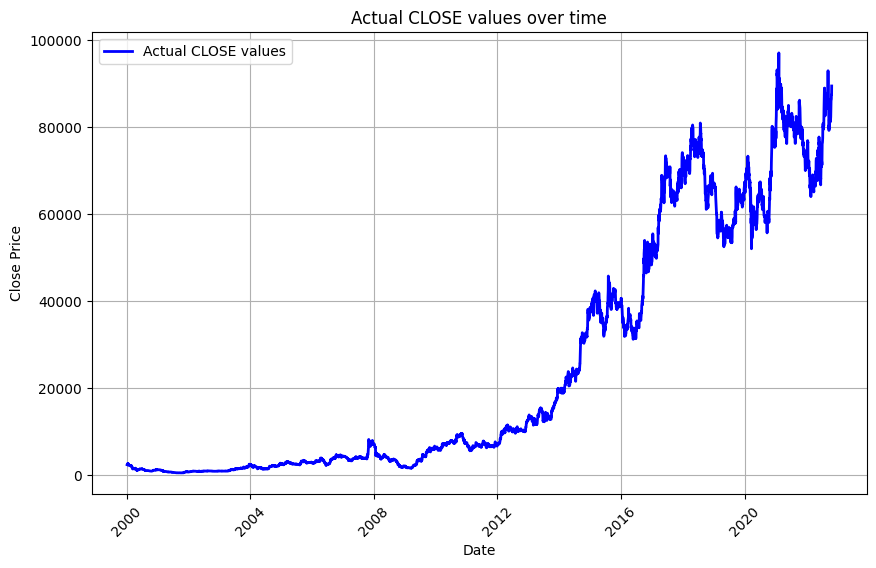

In [50]:
import matplotlib.pyplot as plt

# Assuming 'data' contains the actual CLOSE values and 'DATE' column
plt.figure(figsize=(10, 6))
plt.plot(data['DATE'], data['CLOSE'], label='Actual CLOSE values', color='blue', linewidth=2)
plt.title('Actual CLOSE values over time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


In [52]:
import pandas as pd

# Load the data
data = pd.read_csv("processed_data.csv")  # Replace with your actual file path

# Ensure the DATE column is in datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Sort the data by date to ensure chronological order
data = data.sort_values('DATE')

# Check the first few rows
print(data.head())


           DATE  Price_Range         VWAP  Trend_Indicator    CLOSE
5686 2000-01-03         69.8  2328.105882         0.619073  2354.80
5685 2000-01-04         85.0  2396.018243         0.659504  2426.10
5684 2000-01-05        120.0  2414.719872         0.608082  2350.00
5683 2000-01-06        138.0  2510.653169         0.734340  2536.85
5682 2000-01-07        168.0  2478.733058         0.689709  2470.80


In [69]:
# Check for missing values in the dataset
missing_data = data.isnull().sum()
print(missing_data)



DATE               0
Price_Range        0
VWAP               0
Trend_Indicator    0
CLOSE              0
dtype: int64


In [68]:
# Interpolate missing values
data['Trend_Indicator'] = data['Trend_Indicator'].interpolate(method='linear')

# Check if there are any remaining missing values
print(data.isnull().sum())


DATE               0
Price_Range        0
VWAP               0
Trend_Indicator    0
CLOSE              0
dtype: int64


In [55]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [67]:


# Check if there are any NaN values in the training and testing features
print(np.isnan(X_train).sum())
print(np.isnan(X_test).sum())



0
16


In [61]:
import pandas as pd

# Load your dataset
data = pd.read_csv("processed_data.csv")  # Replace with your actual file name

# Calculate the mean of the 'Trend_Indicator' column
trend_indicator_mean = data['Trend_Indicator'].mean()

# Print the mean value
print("Mean of Trend_Indicator:", trend_indicator_mean)


Mean of Trend_Indicator: 0.5710113086089121


In [76]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your CSV file
input_file = 'processed_data.csv'  # Replace with the path to your input CSV
output_file = 'normalized_output.csv'  # Path for the output CSV

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(input_file)

# Display the first few rows of the data
print("Original Data:")
print(df.head())

# Identify the date column (adjust the column name as necessary)
# Assuming the date column is named 'date' (replace with actual name)
date_column = 'DATE'  # Replace with the actual date column name

# Separate date column and numerical columns
date_data = df[date_column]
numerical_data = df.drop(columns=[date_column])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the numerical data
normalized_data = scaler.fit_transform(numerical_data)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=numerical_data.columns)

# Add the date column back to the normalized DataFrame
normalized_df[date_column] = date_data

# Save the normalized DataFrame to a new CSV file
normalized_df.to_csv(output_file, index=False)

print(f"Normalized data has been saved to {output_file}")


Original Data:
         DATE  Price_Range          VWAP  Trend_Indicator     CLOSE
0  2022-10-28      2251.00  88802.410779         0.853702  89368.30
1  2022-10-27      1649.00  87212.142954         0.788774  87362.85
2  2022-10-25      1592.40  87009.386158         0.788126  87342.85
3  2022-10-24      2042.20  86811.288266         0.754089  86291.55
4  2022-10-21      3977.85  86727.395155         0.751928  86224.80
Normalized data has been saved to normalized_output.csv


In [77]:
import pandas as pd

# Load the normalized CSV file (the one generated from previous code)
normalized_input_file = 'normalized_output.csv'  # Path to the normalized CSV file
reshaped_output_file = 'reshaped_output.csv'  # Path to save the reshaped CSV file

# Read the normalized CSV into a pandas DataFrame
df = pd.read_csv(normalized_input_file)

# Display the first few rows of the normalized data
print("Normalized Data:")
print(df.head())

# Identify the date column (replace with the actual column name if needed)
date_column = 'DATE'  # Replace with the actual date column name

# Reorder the columns to place the date column first
columns = [date_column] + [col for col in df.columns if col != date_column]
df_reshaped = df[columns]

# Save the reshaped DataFrame to a new CSV file
df_reshaped.to_csv(reshaped_output_file, index=False)

print(f"Reshaped data has been saved to {reshaped_output_file}")


Normalized Data:
   Price_Range      VWAP  Trend_Indicator     CLOSE        DATE
0     0.219182  0.934797         0.626521  0.921192  2022-10-28
1     0.160565  0.917968         0.581797  0.900411  2022-10-27
2     0.155054  0.915822         0.581351  0.900204  2022-10-25
3     0.198851  0.913726         0.557906  0.889310  2022-10-24
4     0.387327  0.912838         0.556418  0.888619  2022-10-21
Reshaped data has been saved to reshaped_output.csv


In [79]:
data = pd.read_csv("reshaped_output.csv")

In [80]:
# Check for missing values in the dataset
missing_data = data.isnull().sum()
print(missing_data)



DATE               0
Price_Range        0
VWAP               0
Trend_Indicator    0
CLOSE              0
dtype: int64


## using lstm for training first iteration

Reshaped Data:
         DATE  Price_Range      VWAP  Trend_Indicator     CLOSE
0  2022-10-28     0.219182  0.934797         0.626521  0.921192
1  2022-10-27     0.160565  0.917968         0.581797  0.900411
2  2022-10-25     0.155054  0.915822         0.581351  0.900204
3  2022-10-24     0.198851  0.913726         0.557906  0.889310
4  2022-10-21     0.387327  0.912838         0.556418  0.888619
Epoch 1/100


c:\Users\KAIRAV\TensorForce\TensorForce\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0053 - val_loss: 7.1837e-06
Epoch 2/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013 - val_loss: 3.2973e-06
Epoch 3/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0552e-04 - val_loss: 1.6681e-05
Epoch 4/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7081e-05 - val_loss: 9.2044e-06
Epoch 5/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6105e-05 - val_loss: 6.5676e-06
Epoch 6/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3613e-05 - val_loss: 3.2583e-06
Epoch 7/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1111e-05 - val_loss: 4.8170e-06
Epoch 8/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1646e-05 - val_loss: 4.4126e-06
Epoch 9/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0562e-05 - val_loss: 3.5249e-06
Epoch 10/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.6855e-06 - val_loss: 1.3957e-06
Epoch 11/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9729e

Test Loss: 1.3808151955174708e-08


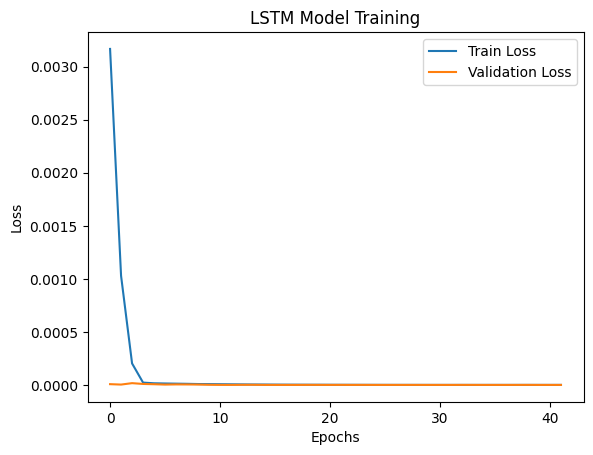

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the reshaped CSV file (with normalized data)
reshaped_input_file = 'reshaped_output.csv'  # Path to the reshaped CSV file
df = pd.read_csv(reshaped_input_file)

# Display the first few rows of the data
print("Reshaped Data:")
print(df.head())

# Extract the date column (assuming the first column is the date)
date_column = 'DATE'  # Replace with the actual date column name if needed
df_features = df.drop(columns=[date_column])

# Assuming 'df_features' contains all normalized features and we're predicting the first feature
X = df_features.values
y = df_features.iloc[:, 0].values  # Example: predict the first feature (adjust as needed)

# Reshape X to be 3D: (samples, time steps, features)
X = X.reshape(X.shape[0], 1, X.shape[1])  # 1 time step in this example

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))  # Assuming you want to predict a single value (adjust if more)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Save the trained model
model.save('lstm_model.h5')

# Optionally, plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Model Training')
plt.show()


## shows overfitting with lesser accuracy

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


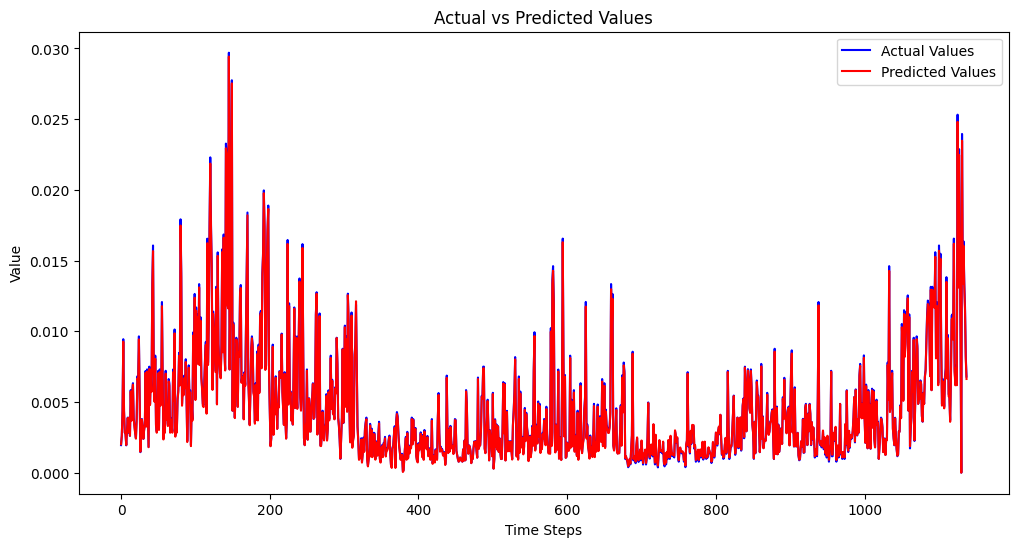

In [82]:
import matplotlib.pyplot as plt

# Make predictions using the trained model
y_pred = model.predict(X_test)

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Actual Values')  # Actual values (test set)
plt.plot(y_pred, color='red', label='Predicted Values')  # Predicted values (model output)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()


In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Avoid division by zero in MAPE calculation by excluding zero values in y_test
non_zero_mask = y_test != 0
y_test_non_zero = y_test[non_zero_mask]
y_pred_non_zero = y_pred[non_zero_mask]

# Calculate MAPE for non-zero values only
mape = np.mean(np.abs((y_test_non_zero - y_pred_non_zero) / y_test_non_zero)) * 100

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R^2 (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R^2: {r2:.4f}')


MAPE: 146.52%
MAE: 0.0001
MSE: 0.0000
RMSE: 0.0001
R^2: 0.9991


## Model training

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Define the model (example for regression)
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile the model with a loss function and optional metrics
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])  # Adding MAE (Mean Absolute Error) as a metric

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50


c:\Users\KAIRAV\TensorForce\TensorForce\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0035 - mae: 0.0326 - val_loss: 9.3347e-06 - val_mae: 0.0020
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019 - mae: 0.0228 - val_loss: 6.2596e-06 - val_mae: 0.0021
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6916e-04 - mae: 0.0120 - val_loss: 1.8572e-06 - val_mae: 0.0012
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8058e-05 - mae: 0.0040 - val_loss: 6.0574e-06 - val_mae: 0.0023
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6256e-05 - mae: 0.0032 - val_loss: 2.7928e-06 - val_mae: 0.0016
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7180e-05 - mae: 0.0028 - val_loss: 1.3964e-06 - val_mae: 0.0011
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5505e-05 - mae: 0.0028 - val_loss: 1.7126e-06 - val_mae: 0.0011
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5697e-05 - mae: 0.0030 - val_loss: 6.2635e-07 - val_mae: 6.3687e-04
Epoch 9

In [97]:
# Evaluate the model on the reshaped data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

# Calculate percentage accuracy
percentage_accuracy = 100 * (1 - (test_mae / y_test.mean()))

print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")
print(f"Percentage Accuracy: {percentage_accuracy:.2f}%")


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.7577e-07 - mae: 6.5760e-04
Test Loss: 4.568382792058401e-07
Test MAE: 0.0006509532686322927
Percentage Accuracy: 85.35%


In [96]:
# Flatten y_test if it's not already 1D
if len(y_test.shape) > 1:
    y_test = y_test.reshape(-1)  # Convert to (1138,)


# hyper parameter tuning

In [ ]:
%pip install keras-tuner


In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Define the model (example for regression)
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile the model with a loss function and optional metrics
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])  # Adding MAE (Mean Absolute Error) as a metric

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=35, validation_data=(X_test, y_test))


Epoch 1/50


c:\Users\KAIRAV\TensorForce\TensorForce\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0063 - mae: 0.0460 - val_loss: 1.5181e-04 - val_mae: 0.0115
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023 - mae: 0.0258 - val_loss: 4.9607e-05 - val_mae: 0.0065
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.8352e-04 - mae: 0.0158 - val_loss: 2.6644e-06 - val_mae: 0.0012
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1959e-04 - mae: 0.0066 - val_loss: 1.8612e-05 - val_mae: 0.0039
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8983e-05 - mae: 0.0031 - val_loss: 1.1695e-05 - val_mae: 0.0030
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8312e-05 - mae: 0.0029 - val_loss: 1.0595e-05 - val_mae: 0.0030
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.6542e-05 - mae: 0.0028 - val_loss: 1.0505e-05 - val_mae: 0.0030
Epoch 8/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9746e-05 - mae: 0.0025 - val_loss: 5.6865e-06 - val_mae: 0.0021
Epoch 9/50


In [112]:
# Evaluate the model on the reshaped data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

# Calculate percentage accuracy
percentage_accuracy = 100 * (1 - (test_mae / y_test.mean()))

print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")
print(f"Percentage Accuracy: {percentage_accuracy:.2f}%")


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7048e-08 - mae: 5.1815e-05
Test Loss: 1.3372147833479175e-08
Test MAE: 4.925198663841002e-05
Percentage Accuracy: 98.89%


## Graph to check if there is a sign of overfitting

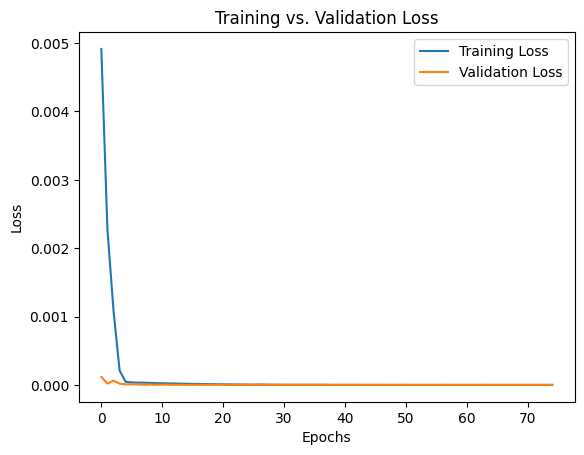

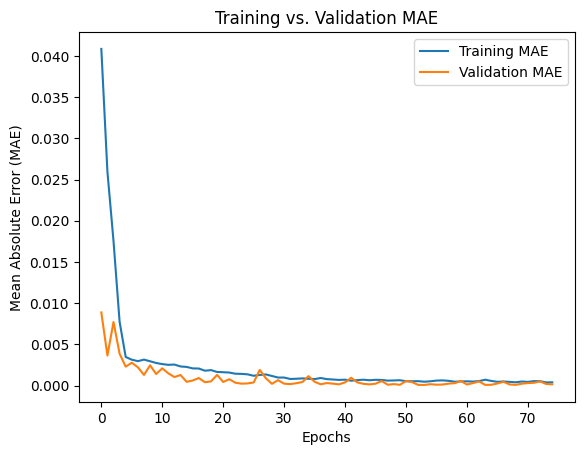

In [116]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()

# Plot MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.title('Training vs. Validation MAE')
plt.show()
